# ECBM 4040 Fall '21 Project  - BIOM Group

# Hyperparameter Tuning: NeuroSEED Linear Model (with gradient clipping)

In this notebook, we will compare the various the distance functions and their respective loss. We will also do hyperparameter tunning for the hyperbolic and euclidean distance and see what hyperparmeters are best and how they differ from the papers hyperparamters. This is all doing with the LINEAR archecture of our Deep Learning Model.

## Initialization

In [ ]:
import numpy as np
import tensorflow as tf
import pickle
from matplotlib import pyplot as plt

import shutil
import os

from model.models_cstm import get_embedding_model
from model.train_model import train_siamese_model

!pip3 install keras-tuner
import keras_tuner


In [30]:
#mapping of different distances
DISTANCE_METRICS = {
    'EUCLIDEAN': 'euclidean',
    'HYPERBOLIC': 'hyperbolic',
    'MANHATTAN': 'manhattan',
    'SQUARE': 'square',
    'COSINE': 'cosine'
}

In [3]:
# set random number seeds for reproducible results
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
# set static parameters
MODEL_CHOICE = 'LINEAR'
DEFAULT_BATCH_SIZE = 1024
NUM_EPOCHS = 5
TRAIN_DAT_LIM = np.nan

# set tuning parameters to search over
LR_SELECTIONS = [1e-2, 1e-3, 1e-4]
DROPOUT_SELECTIONS = [0.3, 0.5, 0.7]
ACTIVATION_SELECTIONS = ['relu','relu','tanh']
NUM_UNITS_SELECTIONS = [128, 256, 512] # NOTE: Not used for linear model
NUM_FILTERS_SELECTIONS = [2,3,4] # NOTE: Not used for linear model
#raise('PLACEHOLDER FOR BATCH SIZE')


In [5]:
# set paths
dist_res_path = "results/{0}_clipgrad/".format(MODEL_CHOICE.lower())

try:
    os.mkdir(dist_res_path)
except:
    pass

hyp_tuner_project_name="random_search_hyp_{0}_clipgrad".format(MODEL_CHOICE.lower())
euc_tuner_project_name="random_search_euc_{0}_clipgrad".format(MODEL_CHOICE.lower())

## Get Qiita Data

In [6]:
cwd = os.getcwd()
if not os.path.exists(f"{cwd}/data/qiita/qiita_numpy.pkl"):
    !wget https://www.dropbox.com/s/mv546rx259tgwaz/qiita_numpy.pkl
    shutil.move(f"{cwd}/qiita_numpy.pkl", f"{cwd}/data/qiita/qiita_numpy.pkl")

## Load Qiita Dataset

In [7]:
# Load QIITA dataset.
((X_train, X_test, X_val), (y_train, y_test, y_val)) = pickle.load(open(f"{cwd}/data/qiita/qiita_numpy.pkl", "rb"))
print('X_train sample:\n{0}'.format(X_train))
dat_lim = TRAIN_DAT_LIM if not np.isnan(TRAIN_DAT_LIM) else len(X_train)
data = ((X_train[:dat_lim], X_test[:dat_lim], X_val[:dat_lim]), (y_train[:dat_lim,:dat_lim], y_test[:dat_lim], y_val[:dat_lim,:dat_lim]))

X_train sample:
[[2 0 1 ... 1 0 3]
 [2 0 3 ... 0 3 0]
 [1 1 3 ... 3 3 1]
 ...
 [2 0 3 ... 3 0 0]
 [2 0 3 ... 0 3 0]
 [0 0 1 ... 2 0 1]]


## Distance Function Hyperparam Tuning 
This is where we get our unique embedding model. For this notebook, we will be using the LINEAR archecture of the embedding model.

In [8]:
embedding = get_embedding_model(model_choice=MODEL_CHOICE)
embedding.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 152)               0         
_________________________________________________________________
one_hot_encoding_layer (OneH (None, 152, 4)            0         
_________________________________________________________________
flatten (Flatten)            (None, 608)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               77952     
Total params: 77,952
Trainable params: 77,952
Non-trainable params: 0
_________________________________________________________________


2021-12-19 19:23:00.862459: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-19 19:23:00.862727: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# get training metrics when distance is EUCLIDEAN, dump to pickle
model_EUCLIDEAN, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['EUCLIDEAN'], batch_size=DEFAULT_BATCH_SIZE, epochs=NUM_EPOCHS)
dist_func_tunning_EUCLIDEAN = {'score': score, 'history': history.history}
file_to_write = open( dist_res_path + "dist_func_tunning_EUCLIDEAN.pkl", "wb" )
pickle.dump(dist_func_tunning_EUCLIDEAN, file_to_write)

# get training metrics when distance is HYPERBOLIC, dump to pickle
model_HYPERBOLIC, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['HYPERBOLIC'], batch_size=DEFAULT_BATCH_SIZE, epochs=NUM_EPOCHS)
dist_func_tunning_HYPERBOLIC = {'score': score, 'history': history.history}
file_to_write = open( dist_res_path + "dist_func_tunning_HYPERBOLIC.pkl", "wb" )
pickle.dump(dist_func_tunning_HYPERBOLIC, file_to_write)

# get training metrics when distance is MANHATTAN, dump to pickle
model_MANHATTAN, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['MANHATTAN'], batch_size=DEFAULT_BATCH_SIZE, epochs=NUM_EPOCHS)
dist_func_tunning_MANHATTAN = {'score': score, 'history': history.history}
file_to_write = open( dist_res_path + "dist_func_tunning_MANHATTAN.pkl", "wb" )
pickle.dump(dist_func_tunning_MANHATTAN, file_to_write)

# get training metrics when distance is SQUARE, dump to pickle
model_SQUARE, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['SQUARE'], batch_size=DEFAULT_BATCH_SIZE, epochs=NUM_EPOCHS)
dist_func_tunning_SQUARE = {'score': score, 'history': history.history}
file_to_write = open( dist_res_path + "dist_func_tunning_SQUARE.pkl", "wb" )
pickle.dump(dist_func_tunning_SQUARE, file_to_write)

# get training metrics when distance is COSINE, dump to pickle
model_COSINE, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['COSINE'], batch_size=DEFAULT_BATCH_SIZE, epochs=NUM_EPOCHS)
dist_func_tunning_COSINE = {'score': score, 'history': history.history}
file_to_write = open( dist_res_path + "dist_func_tunning_COSINE.pkl", "wb" )
pickle.dump(dist_func_tunning_COSINE, file_to_write)



Epoch 1/5
23922/23922 [==============================] - 257s 11ms/step - loss: 19.6838 - val_loss: 39.5207
Epoch 2/5
23922/23922 [==============================] - 253s 11ms/step - loss: 19.4373 - val_loss: 38.9925
Epoch 3/5
23922/23922 [==============================] - 254s 11ms/step - loss: 19.2420 - val_loss: 38.6141
Epoch 4/5
23922/23922 [==============================] - 252s 11ms/step - loss: 19.0816 - val_loss: 38.1651
Epoch 5/5
1097/1097 [==============================] - 8s 7ms/step - loss: 36.8325
Epoch 1/5
23922/23922 [==============================] - 384s 16ms/step - loss: 2463.4170 - val_loss: 2238.2727
Epoch 2/5
23922/23922 [==============================] - 383s 16ms/step - loss: 2242.3474 - val_loss: 2122.1194
Epoch 3/5
23922/23922 [==============================] - 382s 16ms/step - loss: 2153.6685 - val_loss: 2055.1113
Epoch 4/5
23922/23922 [==============================] - 387s 16ms/step - loss: 2096.7380 - val_loss: 2008.1853
Epoch 5/5
1097/1097 [================

## Visualize Dist_Func_Tunning 

We will now show some plots, highlighting the vast diffences in the loss between the various distance functions.

In [28]:
objects = {}
#get model training metrics from all the pickle files
dist_res_path = dist_res_path
for key in DISTANCE_METRICS.keys():
    file = f'{dist_res_path}dist_func_tunning_{key}.pkl'
    with (open(file, "rb")) as openfile:
        objects[key] = pickle.load(openfile)

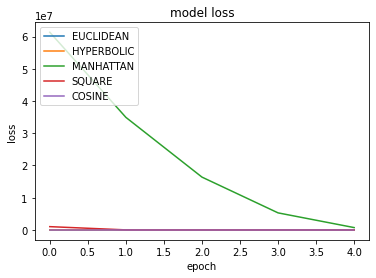

In [29]:
# plot loss for all distances
for key in DISTANCE_METRICS.keys():    
    plt.plot(objects[key]['history']['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(list(DISTANCE_METRICS.keys()), loc='upper left')
plt.show()

Notice we have a huge dispersion and variance of the loss with respect to the distance functions. Lets take a closer look at the ones that are really low in the plot below.

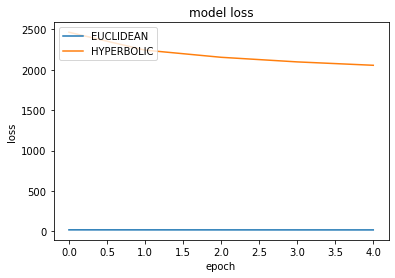

In [21]:
for key in ['EUCLIDEAN', 'HYPERBOLIC']: 
    if key != 'MANHATTAN' or key != 'SQUARE' or key != 'COSINE':
        plt.plot(objects[key]['history']['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['EUCLIDEAN', 'HYPERBOLIC'], loc='upper left')
plt.show()

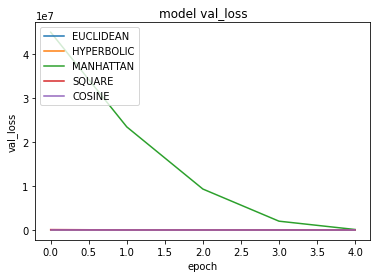

In [22]:
for key in DISTANCE_METRICS.keys():    
    plt.plot(objects[key]['history']['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(list(DISTANCE_METRICS.keys()), loc='upper left')
plt.show()

Notice we have a huge dispersion and variance of the val_loss with respect to the distance functions. Lets take a closer look at the ones that are really low in the plot below.

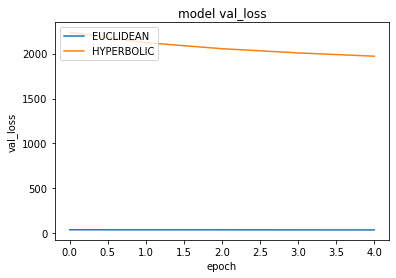

In [23]:
for key in ['EUCLIDEAN', 'HYPERBOLIC']: 
    if key != 'MANHATTAN' or key != 'SQUARE' or key != 'COSINE':
        plt.plot(objects[key]['history']['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['EUCLIDEAN', 'HYPERBOLIC'], loc='upper left')
plt.show()

# HyperParam Tunning with RandomSearchCV

In [24]:
from model.layer import DistanceLayer
from model.models_cstm import SiameseModel
from model.generator import SequenceDistDataGenerator


# followed tutorial from https://www.tensorflow.org/tutorials/keras/keras_tuner to customize RandomSearch
# for keras models
def model_builder_hyp(hp):
    # Model definitions
    in1 = tf.keras.layers.Input(name="sequence1", shape=(152,))
    in2 = tf.keras.layers.Input(name="sequence2", shape=(152,))
    
    #add activition func, and dropout valuse to the grid search for RandomCV
    hp_act_func = hp.Choice('act_func', values=ACTIVATION_SELECTIONS)
    hp_dropout = hp.Choice('dropout', values=DROPOUT_SELECTIONS)
#     hp_num_units = hp.Choice('mlp_num_units_hidden', values=NUM_UNITS_SELECTIONS)
#     hp_num_filters = hp.Choice('cnn_num_filters', values=NUM_FILTERS_SELECTIONS)
    
    # get embedding model
    embedding_model = get_embedding_model(model_choice=MODEL_CHOICE, act_func=hp_act_func, dropout=hp_dropout)
    
    # create distance, will compute distance from two embeddings
    distance = DistanceLayer(metric=DISTANCE_METRICS['HYPERBOLIC'], dynamic=True)(
        embedding_model(in1), 
        embedding_model(in2)
    )
    
    # create keras model
    siamese_network = tf.keras.models.Model(
        inputs=[in1, in2],
        outputs=distance
    )
    
    # add learning rate to search grid for RandomSearch
    hp_learning_rate = hp.Choice('learning_rate', values=LR_SELECTIONS)
    optimizer  = tf.keras.optimizers.Adam(hp_learning_rate, clipnorm=1)
    
    model = SiameseModel(siamese_network) # Depends on SiameseModel class, which we can define elsewhere
    model.compile(optimizer=optimizer) # run_eagerly is not necessary, but useful for debugging
    
    return model

def model_builder_euc(hp):
    # Model definitions
    in1 = tf.keras.layers.Input(name="sequence1", shape=(152,))
    in2 = tf.keras.layers.Input(name="sequence2", shape=(152,))
    
    #add activition func, and dropout valuse to the grid search for RandomCV
    hp_act_func = hp.Choice('act_func', values=ACTIVATION_SELECTIONS)
    hp_dropout = hp.Choice('dropout', values=DROPOUT_SELECTIONS)
#     hp_num_units = hp.Choice('mlp_num_units_hidden', values=NUM_UNITS_SELECTIONS)
#     hp_num_filters = hp.Choice('cnn_num_filters', values=NUM_FILTERS_SELECTIONS)
    
    # get embedding model
    embedding_model = get_embedding_model(model_choice=MODEL_CHOICE, act_func=hp_act_func, dropout=hp_dropout)
    
    # create distance, will compute distance from two embeddings
    distance = DistanceLayer(metric=DISTANCE_METRICS['EUCLIDEAN'], dynamic=True)(
        embedding_model(in1), 
        embedding_model(in2)
    )

    # create keras model
    siamese_network = tf.keras.models.Model(
        inputs=[in1, in2],
        outputs=distance
    )
    
    # add learning rate to search grid for RandomSearch
    hp_learning_rate = hp.Choice('learning_rate', values=LR_SELECTIONS)
    optimizer  = tf.keras.optimizers.Adam(hp_learning_rate, clipnorm=1)
    
    model = SiameseModel(siamese_network) # Depends on SiameseModel class, which we can define elsewhere
    model.compile(optimizer=optimizer) # run_eagerly is not necessary, but useful for debugging
    
    return model

class MyTuner(keras_tuner.tuners.RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        # You can add additional HyperParameters for preprocessing and custom training loops
        # via overriding `run_trial` 256, 512, 1024
        kwargs['batch_size'] = trial.hyperparameters.Choice('batch_size', values = [256, 512, 1024])
        kwargs['epochs'] = NUM_EPOCHS

        X_val, y_val = kwargs['validation_data']
        training_generator = SequenceDistDataGenerator( X_train, y_train, batch_size = kwargs['batch_size'] )
        kwargs['validation_data'] = SequenceDistDataGenerator( X_val, y_val, batch_size = kwargs['batch_size'])
        
        return super(MyTuner, self).run_trial(trial, training_generator, **kwargs)

## RandomSearchCV Hyperparam Tuning (w/ Hyperbolic)

In [25]:
# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(model_builder_hyp, objective='val_loss' , directory='hyper_param_tunning',
                     project_name=hyp_tuner_project_name, max_trials=6)

# Don't pass epochs or batch_size here, let the Tuner tune them.
# run the code below if you want to start search again
# tuner.search(X_train, y_train,  validation_data=(X_val,y_val),
#              callbacks= [tf.keras.callbacks.EarlyStopping('val_loss', patience=2)])

INFO:tensorflow:Reloading Oracle from existing project hyper_param_tunning/random_search_hyp_linear_clipgrad/oracle.json
INFO:tensorflow:Reloading Tuner from hyper_param_tunning/random_search_hyp_linear_clipgrad/tuner0.json


In [26]:
# Get the optimal hyperparameters
best_hps_HYPERBOLIC=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps_HYPERBOLIC
file_to_write = open( dist_res_path + "best_hyps_HYPERBOLIC.pkl", "wb")
pickle.dump(best_hps_HYPERBOLIC, file_to_write)

In [27]:
tuner.results_summary(1)

Results summary
Results in hyper_param_tunning/random_search_hyp_linear_clipgrad
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
act_func: tanh
dropout: 0.7
learning_rate: 0.01
batch_size: 512
Score: 977.1322631835938


## RandomSearchCV Hyperparam Tuning (w/ Euclidean)

In [14]:
# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(model_builder_euc, objective='val_loss', directory='hyper_param_tunning',
                     project_name=euc_tuner_project_name,  max_trials=6)

# Don't pass epochs or batch_size here, let the Tuner tune them.
# run the code below if you want to start search again
# tuner.search(X_train, y_train,  validation_data=(X_val,y_val),
#              callbacks= [tf.keras.callbacks.EarlyStopping('val_loss', patience=2)])

Trial 5 Complete [01h 23m 46s]
val_loss: 138.60617065429688

Best val_loss So Far: 35.36300277709961
Total elapsed time: 04h 02m 28s
INFO:tensorflow:Oracle triggered exit


In [15]:
# Get the optimal hyperparameters
best_hps_EUCLIDEAN=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps_EUCLIDEAN
file_to_write = open( dist_res_path + "best_hyps_EUCLIDEAN.pkl", "wb")
pickle.dump(best_hps_EUCLIDEAN, file_to_write)

In [17]:
tuner.results_summary(1)

Results summary
Results in hyper_param_tunning/random_search_euc_linear_clipgrad
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
act_func: relu
dropout: 0.5
learning_rate: 0.0001
batch_size: 512
Score: 35.36300277709961
